In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

df=pd.read_csv('/content/drive/MyDrive/BlackFriday.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [4]:
# To display to 5 rows.
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# To get furthur information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
# Finding null values in each column:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

From above we can say that only column "Product_Category_2" and "Product_Category_3" have null values in the dataset.
But the total count of null values is very large therefore we can cannot just delete them.

In [7]:
df=df.drop(['Product_Category_3','Product_Category_2'],axis=1)

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Here we dropped column **Product_Category_2** and **Product_Category_3**  as in these column **more than 50%** of data was missing.

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

As the dataset doesn't contain any null values we can analyse it.

In [10]:
# Finding Unique customers
len(df['User_ID'].unique())


5891

Only ***5891*** Unique customers are there.

In [11]:
# Finding Unique Products
len(df['Product_ID'].unique())

3623

There exist only ***3632*** Unique Products in the given dataset

In [12]:
# Finding different gender categories among the customers
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [13]:
df['Age'].unique()


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
# Finding different occupations practised by the customers
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [15]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
df['Marital_Status'].unique()

array([0, 1])

In [18]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

In [19]:
# Total Money spent on Black Friday Sale
df['Purchase'].sum()

5017668378

A total of ***$5,017,668,378*** was spent by customers in the Black Friday Sale.

In [20]:
for column in df.columns:
  print(column,"",len(df[column].unique()))

User_ID  5891
Product_ID  3623
Gender  2
Age  7
Occupation  21
City_Category  3
Stay_In_Current_City_Years  5
Marital_Status  2
Product_Category_1  18
Purchase  17959


# ***Analyzing Gender***

In [21]:
# Total Males that purchased something in the sale:
df['Gender']=='M'

0         False
1         False
2         False
3         False
4          True
          ...  
537572     True
537573     True
537574     True
537575     True
537576     True
Name: Gender, Length: 537577, dtype: bool

In [22]:
df[df['Gender']=='M']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [23]:
len(df[df['Gender']=='M'])

405380

Total males who purchased something in the sale = **405380**

In [24]:
len(df[df['Gender']=='F'])

132197

Total females who purchased something in the sale = **132197**

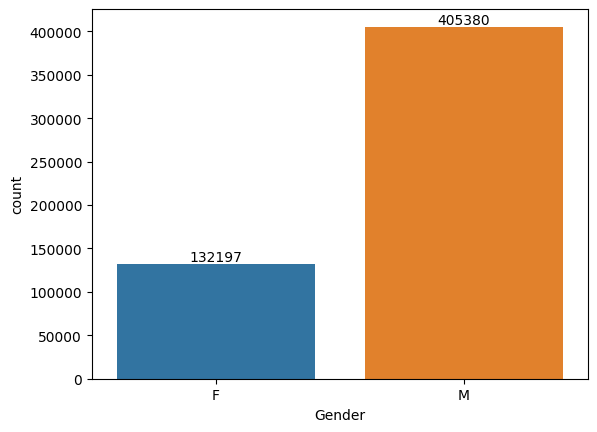

In [25]:
# Plotting a bar graph:
# countplot() method is used to Show the counts of observations in each categorical bin using bars
ax=sns.countplot(x='Gender',data=df)

for bar in ax.containers:
  ax.bar_label(bar)

<Axes: ylabel='Ratio'>

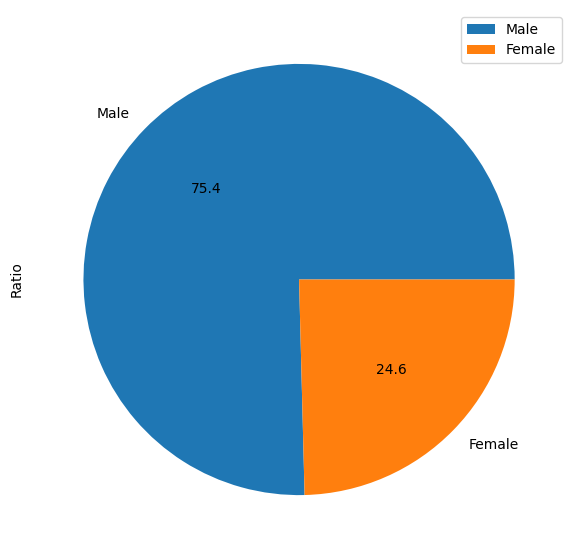

In [26]:
data=pd.DataFrame({'Ratio' : [len(df[df['Gender']=='M']), len(df[df['Gender']=='F'])] }, index=['Male','Female'])
data.plot.pie(y='Ratio', autopct='%.1f',figsize=(7,7))

<Axes: >

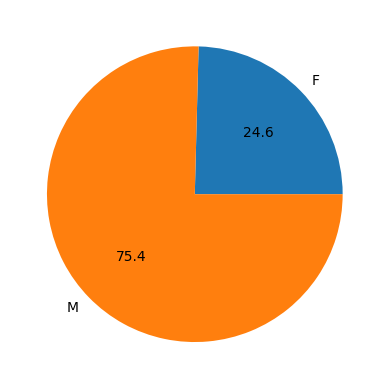

In [27]:
# Also be done in a simpler way
df.groupby('Gender').size().plot(kind='pie',autopct="%.1f")

In [28]:
# Amount of money spent by each gender:
df.groupby('Gender').sum()['Purchase']

<ipython-input-28-31c7e1cc4dc6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').sum()['Purchase']


Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<ipython-input-29-f88125672a05>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct='%.1f')


<Axes: ylabel='Purchase'>

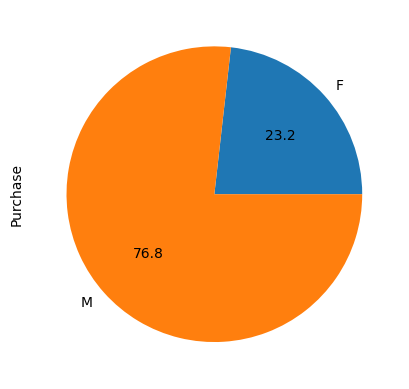

In [29]:
# Plotting the given amount in pie chart:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct='%.1f')

<ipython-input-30-256481d94b35>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()['Purchase'].plot(kind='pie',autopct='%.2f')


<Axes: ylabel='Purchase'>

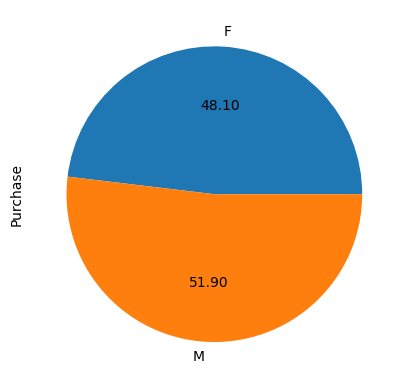

In [30]:
df.groupby('Gender').mean()['Purchase'].plot(kind='pie',autopct='%.2f')

We can observe that although there are more males and total money spent by males far exceeds that of females but the **average amount** of money spent by Males and females are somewhat **similar**.  

***Observations***


1.   Number of Males far exceeds Females.
2.   Average money spent by both males and females are similar.



# ***Analyzing Age and Marital Status***

In [31]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


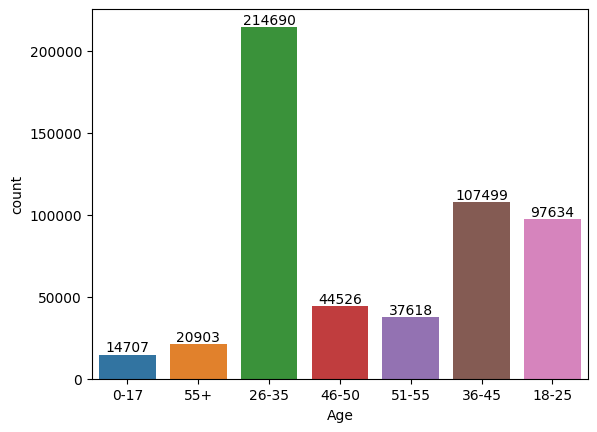

In [32]:
ax=sns.countplot(x='Age',data=df)

for bar in ax.containers:
  ax.bar_label(bar)

From the countplot we can say that people in age **26-35** are in majority.

<ipython-input-33-3e1cac494157>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').sum()['Purchase'].plot(kind='bar')


<Axes: xlabel='Age'>

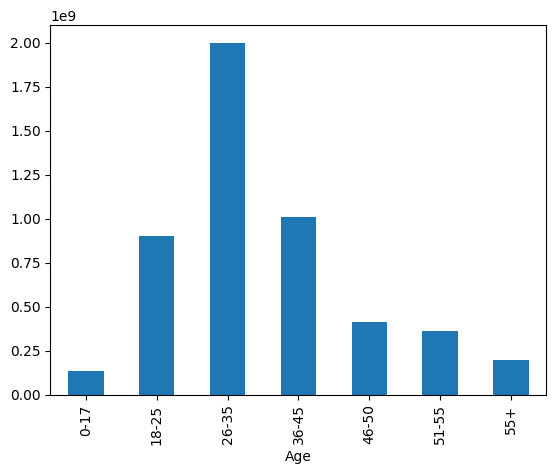

In [33]:
# Amount spent by Age:
df.groupby('Age').sum()['Purchase'].plot(kind='bar')

From the above bar charts we can say that the majority of money is spent by the age group **18-45**. And this age group can be our target customers for launching a new product.

<ipython-input-34-154f56403aa3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').mean()['Purchase'].plot(kind='bar')


<Axes: xlabel='Age'>

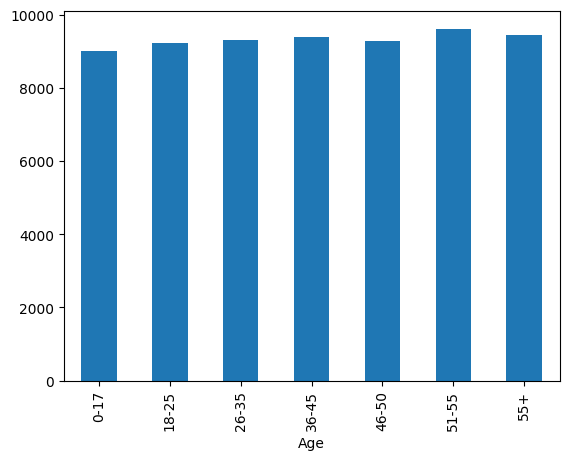

In [34]:
# Average amount spent by each age group:
df.groupby('Age').mean()['Purchase'].plot(kind='bar')

**Average amount** of money spent by each age group is **same**.

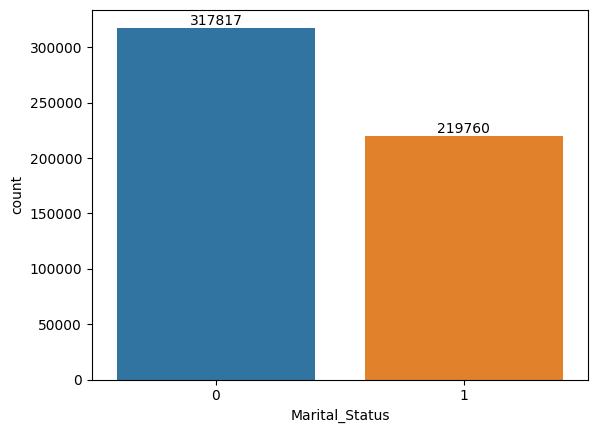

In [35]:
# Married vs Un-married
ax=sns.countplot(x='Marital_Status',data=df)

for bar in ax.containers:
  ax.bar_label(bar)

There are more un-married people as compared to married.

<ipython-input-36-ab88d772b17a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Marital_Status').sum()['Purchase'].plot(kind='bar')


<Axes: xlabel='Marital_Status'>

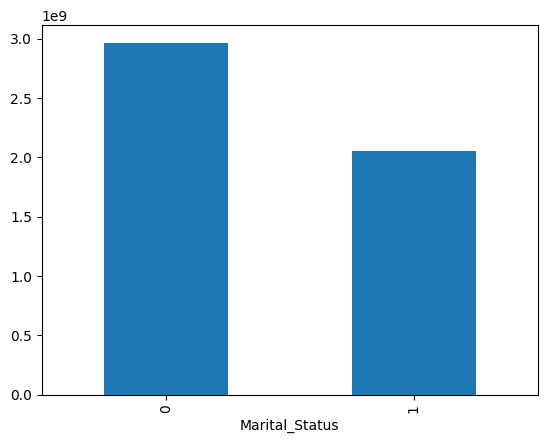

In [36]:
df.groupby('Marital_Status').sum()['Purchase'].plot(kind='bar')

Here we can say that more amoutn of money was earned form the un-married people

<ipython-input-37-452f7c8bdf22>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Marital_Status').mean()['Purchase'].plot(kind='bar')


<Axes: xlabel='Marital_Status'>

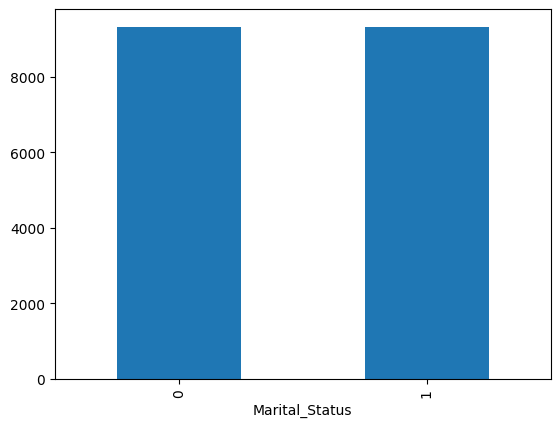

In [37]:
df.groupby('Marital_Status').mean()['Purchase'].plot(kind='bar')

Purchasing power of both married and un married people are same

# ***Multi-Column Analysis***

In [38]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


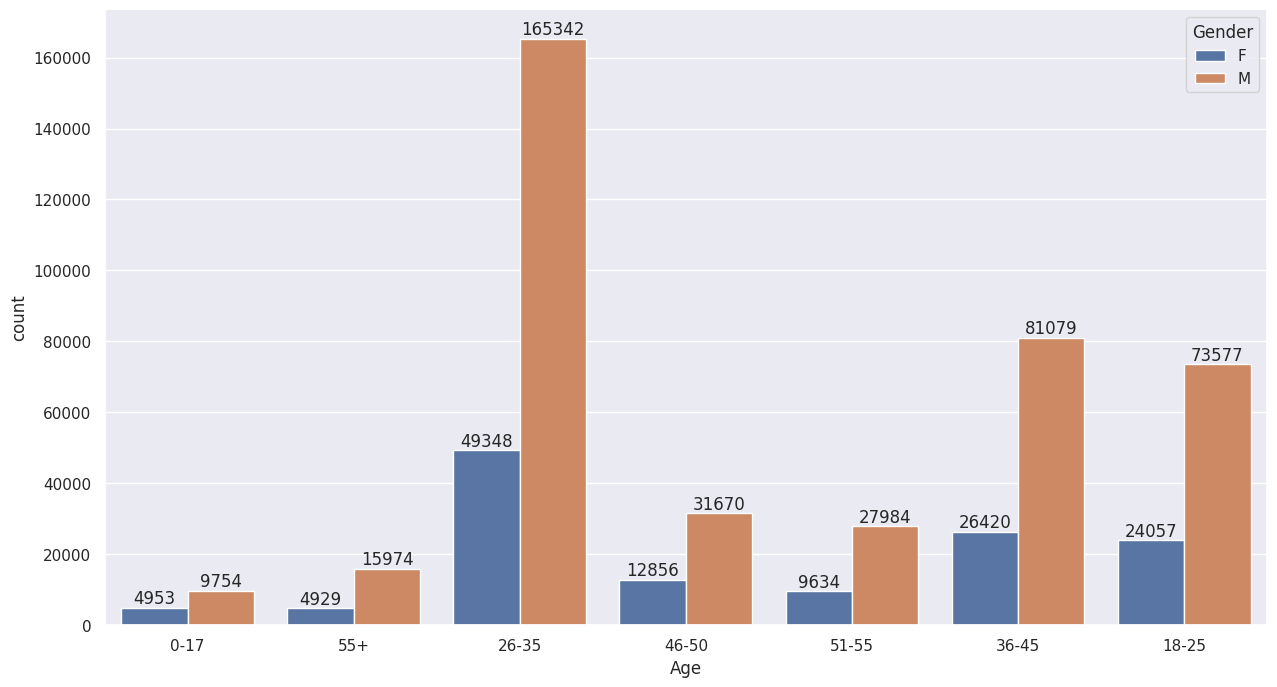

In [45]:
sns.set(rc = {'figure.figsize': (15,8)})

ax=sns.countplot(data=df,x='Age',hue='Gender')


for bar in ax.containers:
  ax.bar_label(bar)

Most customers are **Males** in age group **26-35**

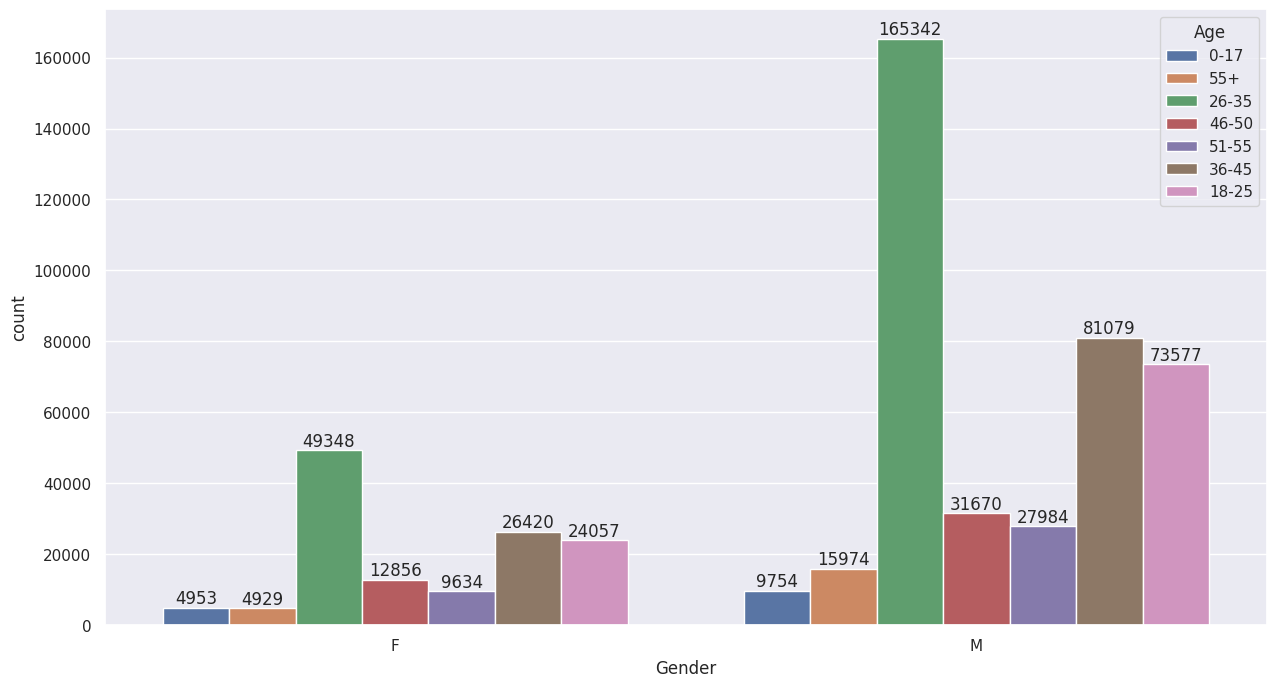

In [48]:
ax=sns.countplot(x='Gender',hue='Age',data=df)
for bar in ax.containers:
  ax.bar_label(bar)

<Axes: xlabel='Gender', ylabel='count'>

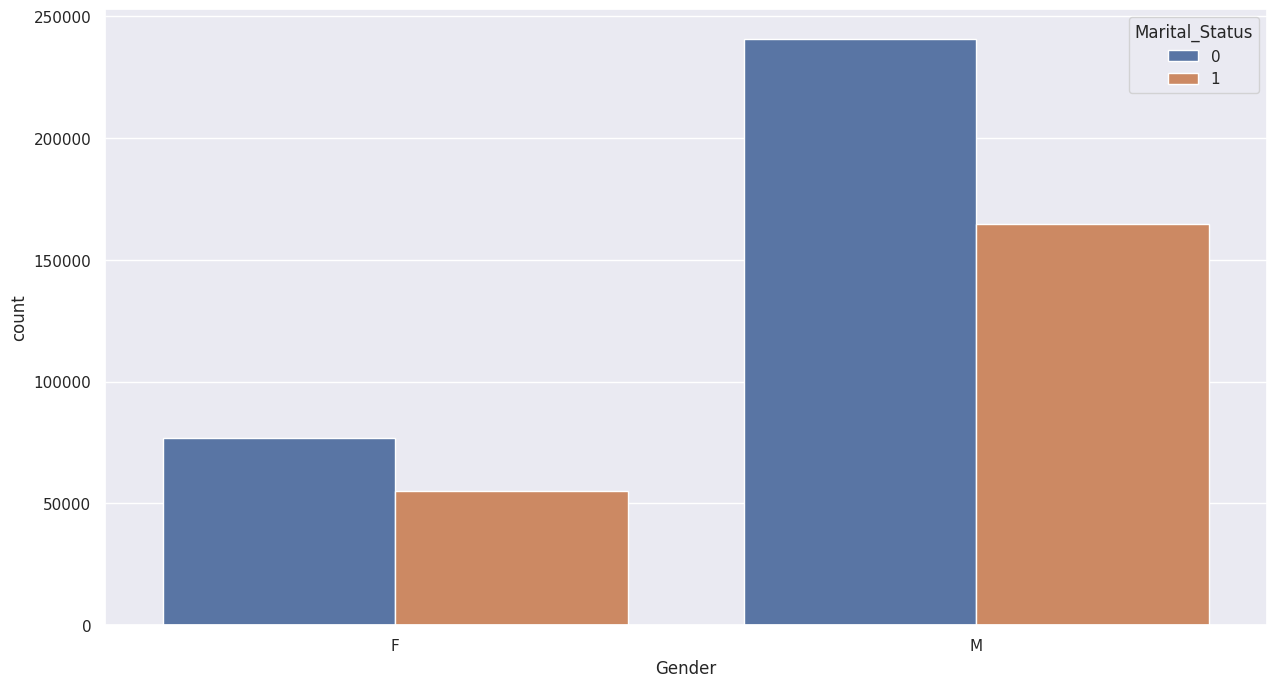

In [49]:
sns.countplot(x='Gender',hue='Marital_Status',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

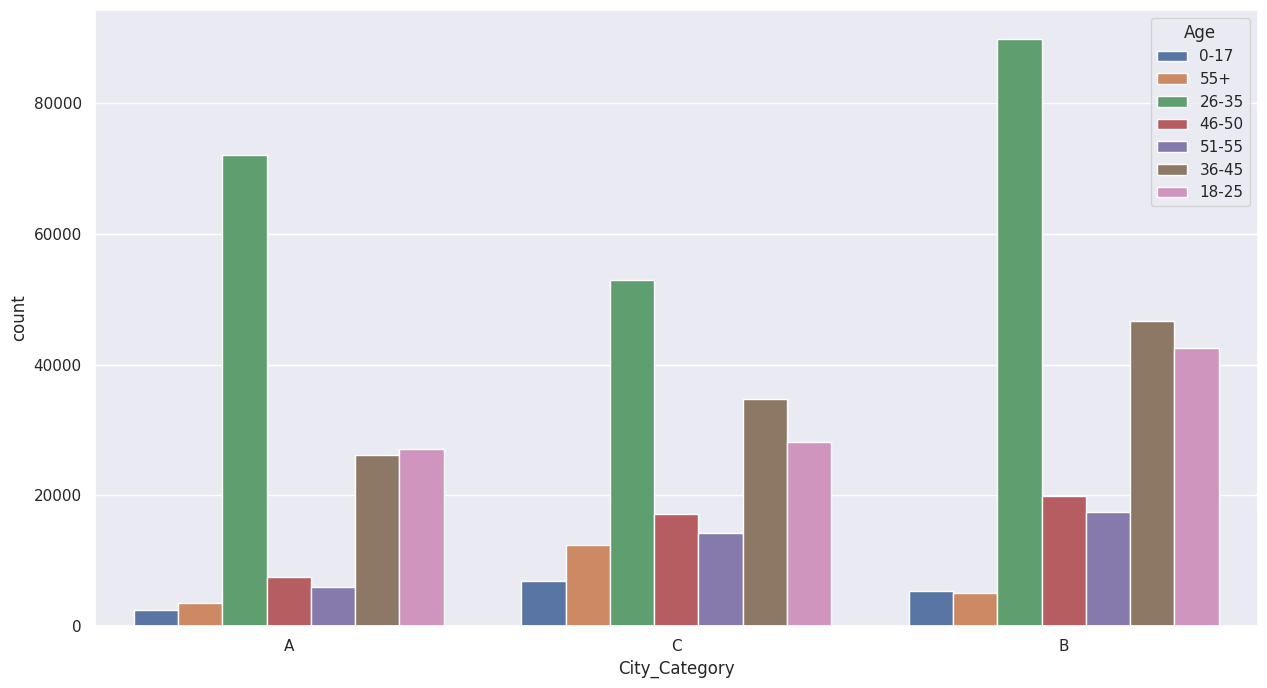

In [53]:
# Most people are from City B with age in range 26-35:
sns.countplot(x='City_Category',data=df,hue='Age')

<Axes: >

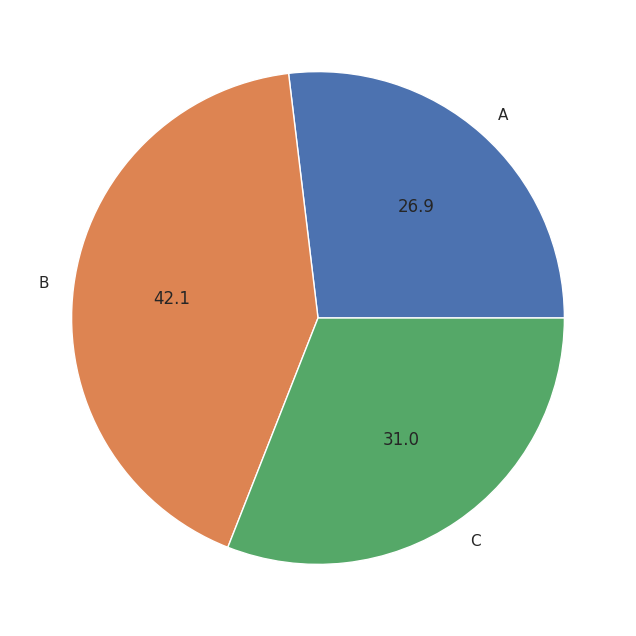

In [54]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%.1f')

<ipython-input-55-46abe1d0656b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%.1f')


<Axes: ylabel='Purchase'>

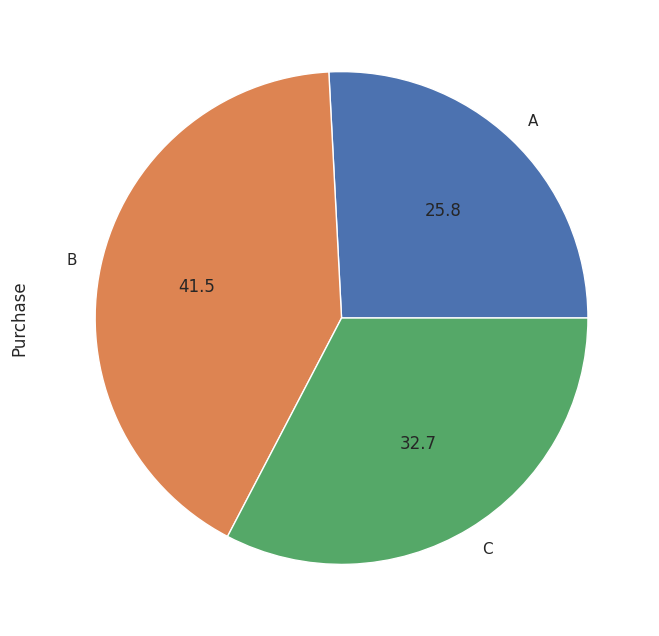

In [55]:
# City with most purchase:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%.1f')
# People from City B buys most.

# ***Occupation and Product Analysis***

In [56]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


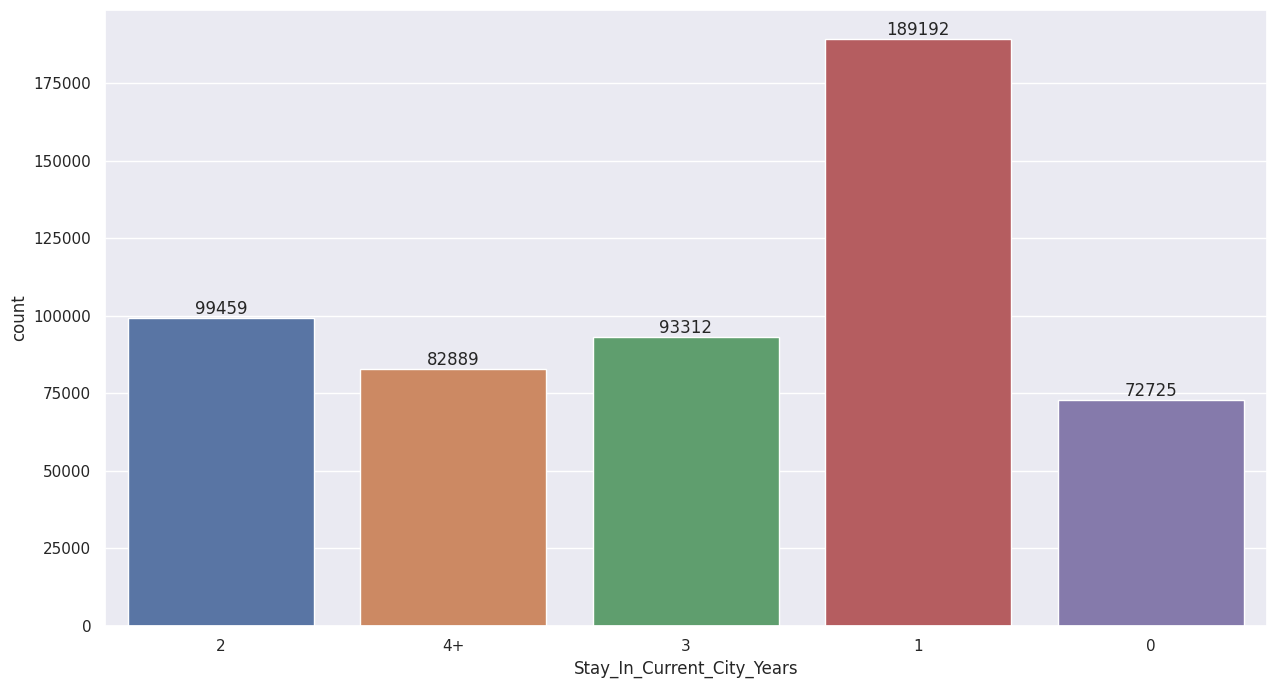

In [57]:
ax=sns.countplot(x='Stay_In_Current_City_Years',data=df)

for bar in ax.containers:
  ax.bar_label(bar)

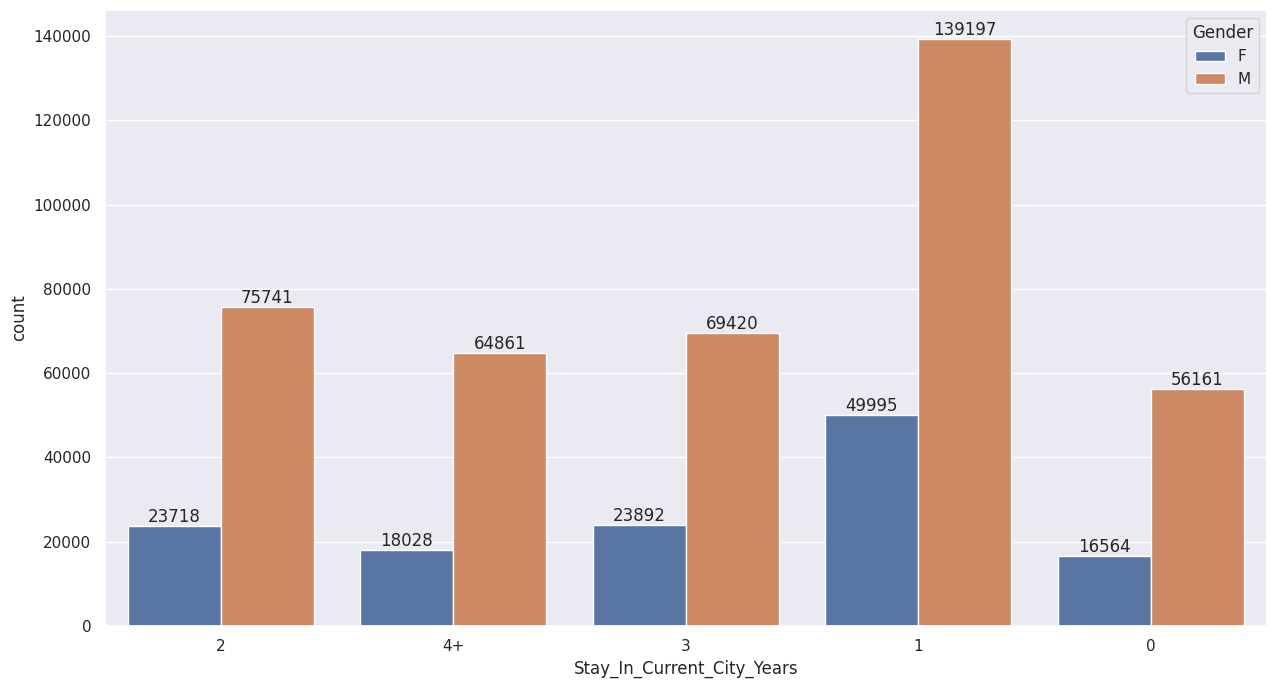

In [58]:
ax=sns.countplot(x='Stay_In_Current_City_Years',data=df,hue='Gender')

for bar in ax.containers:
  ax.bar_label(bar)

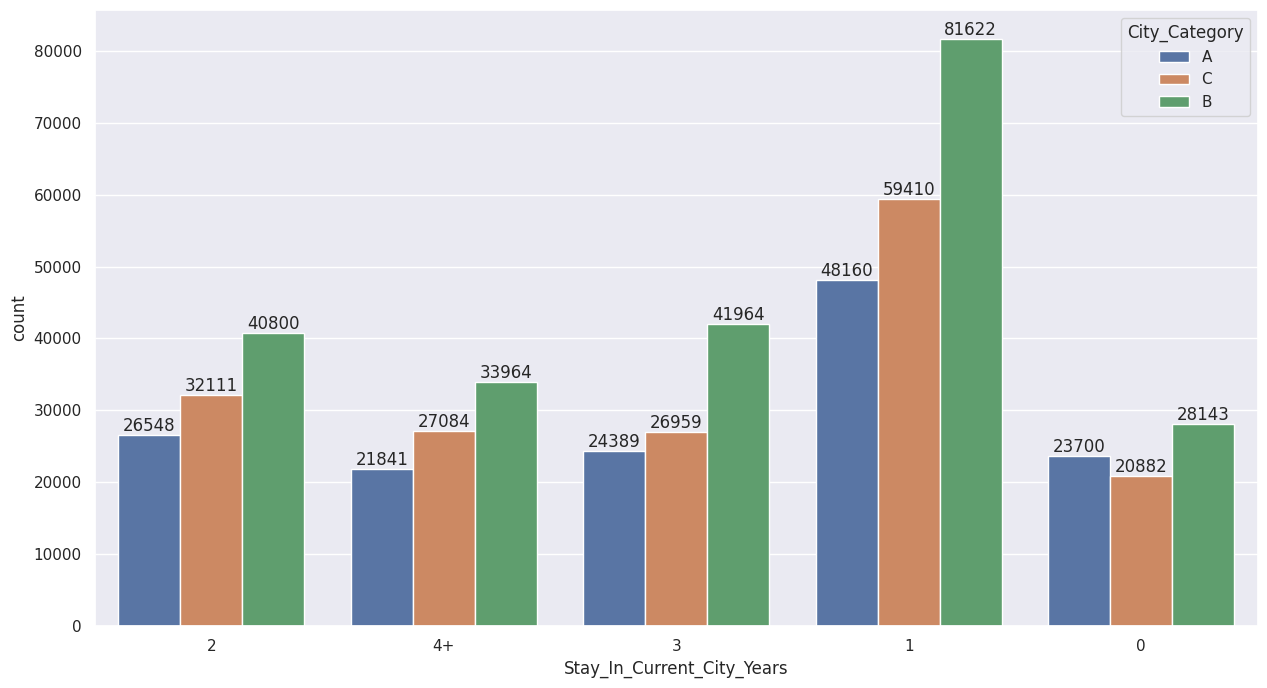

In [60]:
ax=sns.countplot(x='Stay_In_Current_City_Years',data=df,hue='City_Category')

for bar in ax.containers:
  ax.bar_label(bar)

<ipython-input-62-71cbd92b0443>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='bar')


<Axes: xlabel='Stay_In_Current_City_Years'>

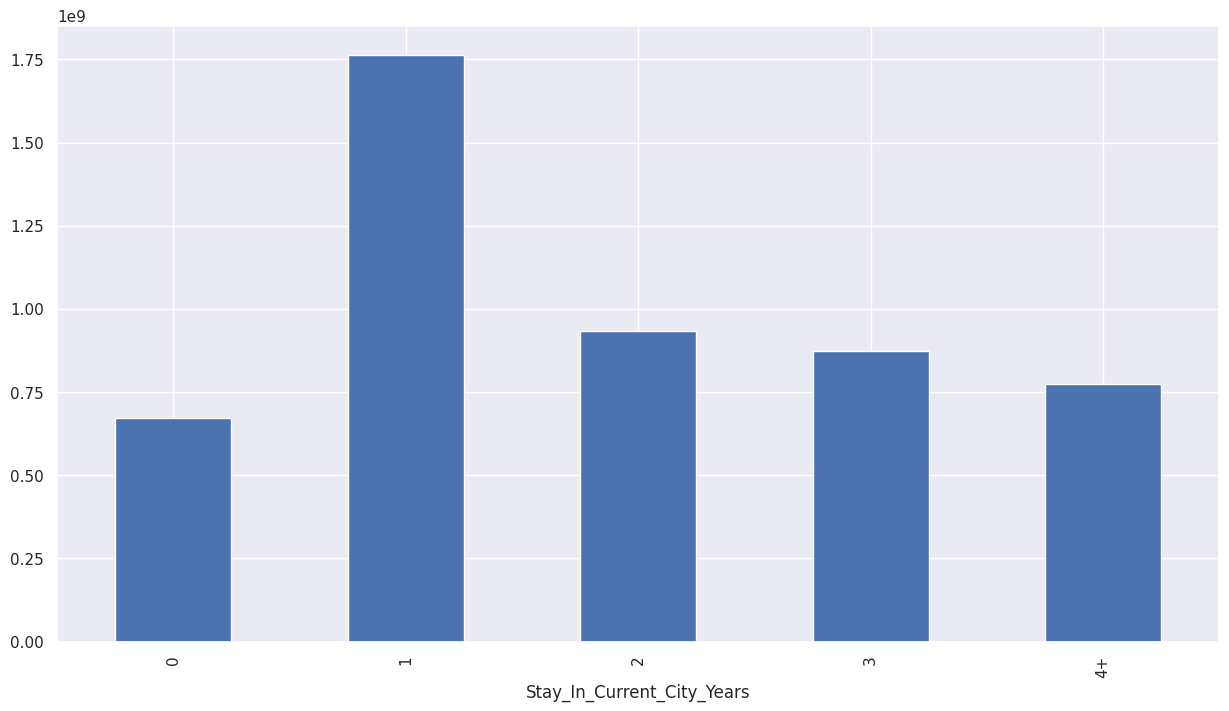

In [62]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='bar')

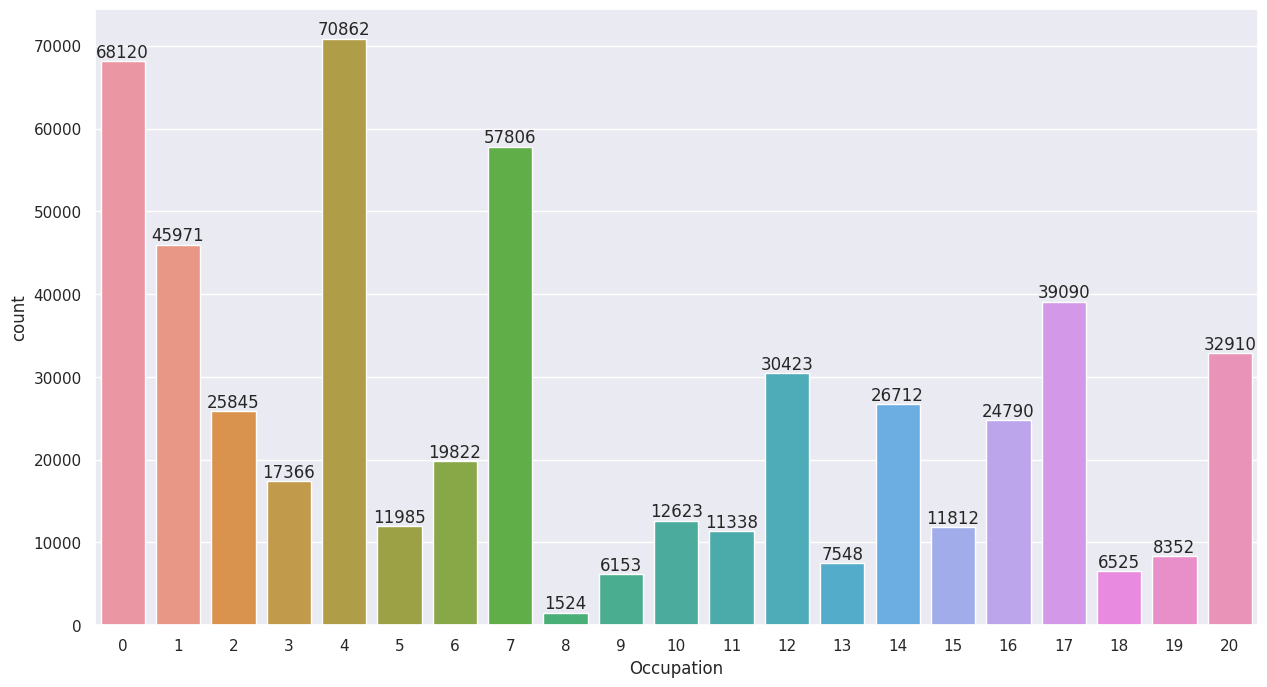

In [63]:
ax=sns.countplot(x='Occupation',data=df)

for bar in ax.containers:
  ax.bar_label(bar)

Occupation **0,4,7** are the major customers

<Axes: xlabel='Occupation'>

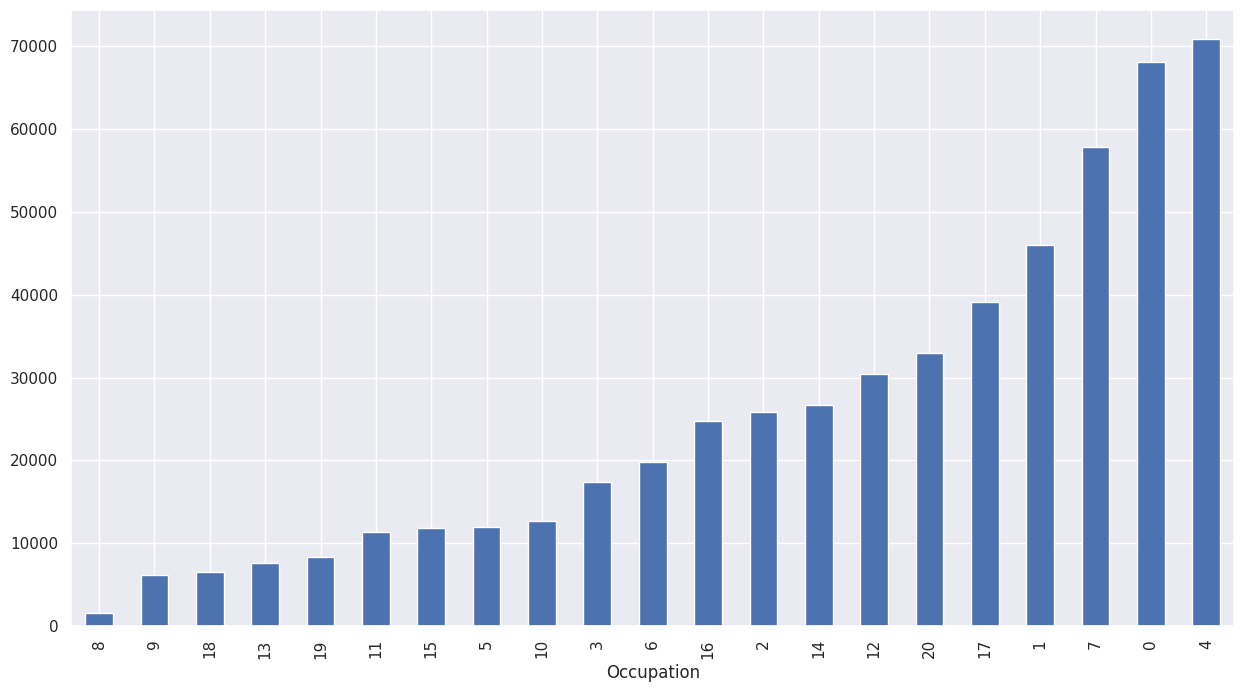

In [65]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

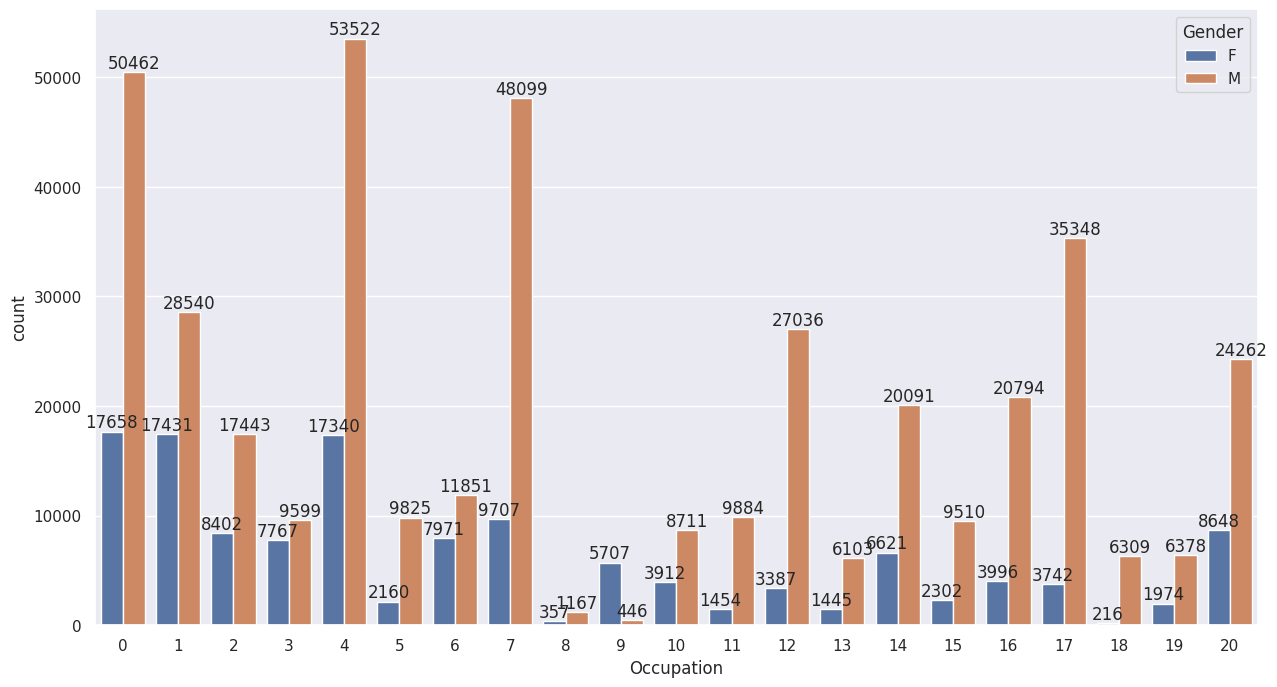

In [67]:
ax=sns.countplot(x='Occupation',data=df,hue='Gender')

for bar in ax.containers:
  ax.bar_label(bar)

In [74]:
# Way to merge 2 columns:
df["MaritalGender"] = df['Gender'] +"_"+ df["Marital_Status"].astype(str)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0
...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664,M_0
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196,M_0
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043,M_0
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

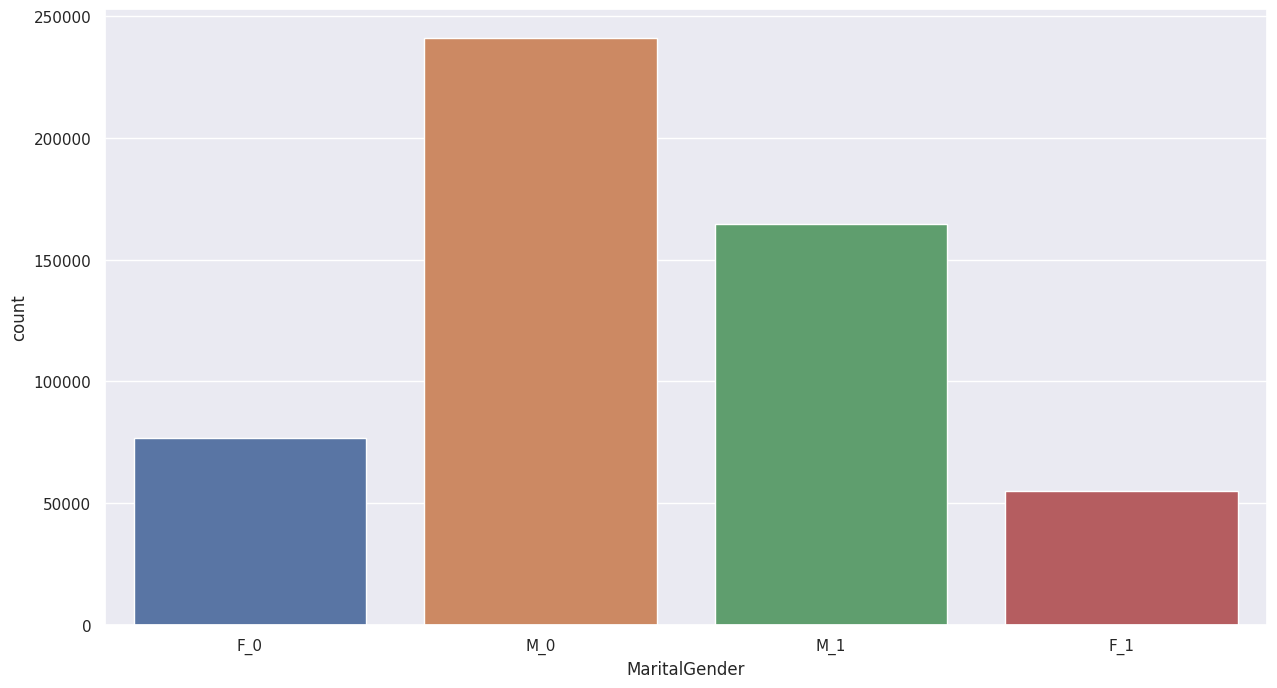

In [75]:
sns.countplot(x='MaritalGender',data=df)

<Axes: xlabel='Age', ylabel='count'>

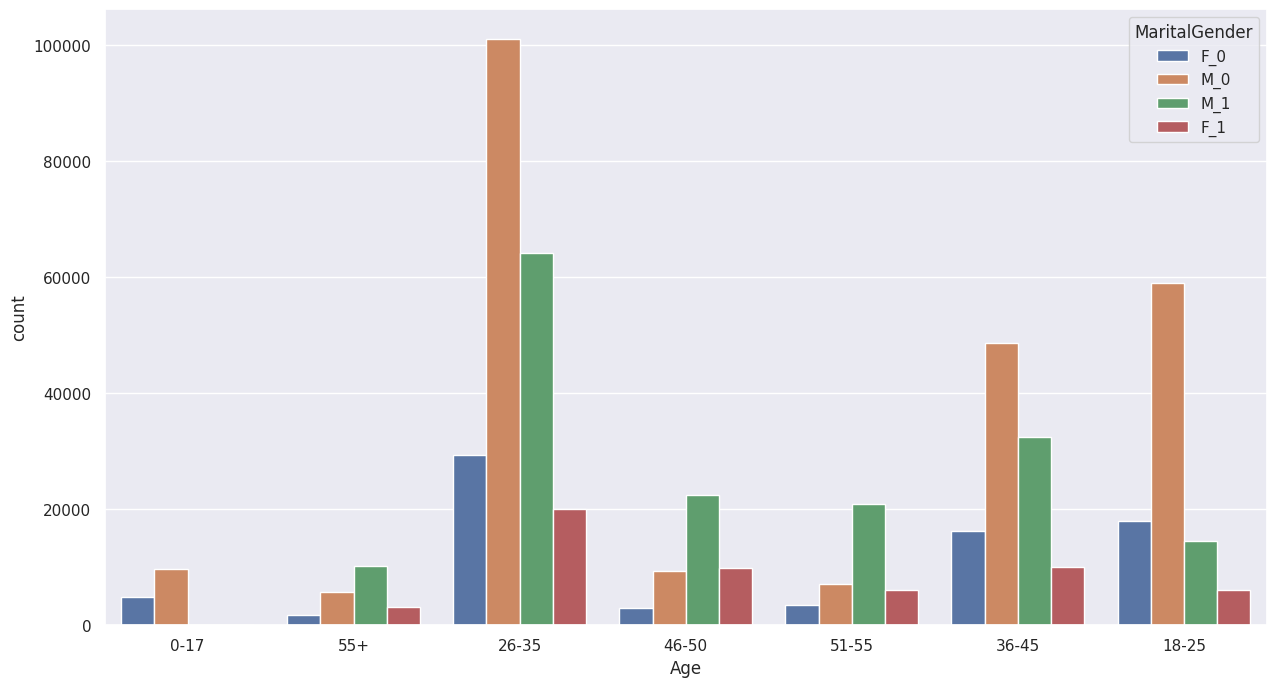

In [76]:
sns.countplot(x='Age',data=df,hue='MaritalGender')

<ipython-input-79-a6249b491aaf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('MaritalGender').sum()['Purchase'].plot(kind='bar')


<Axes: xlabel='MaritalGender'>

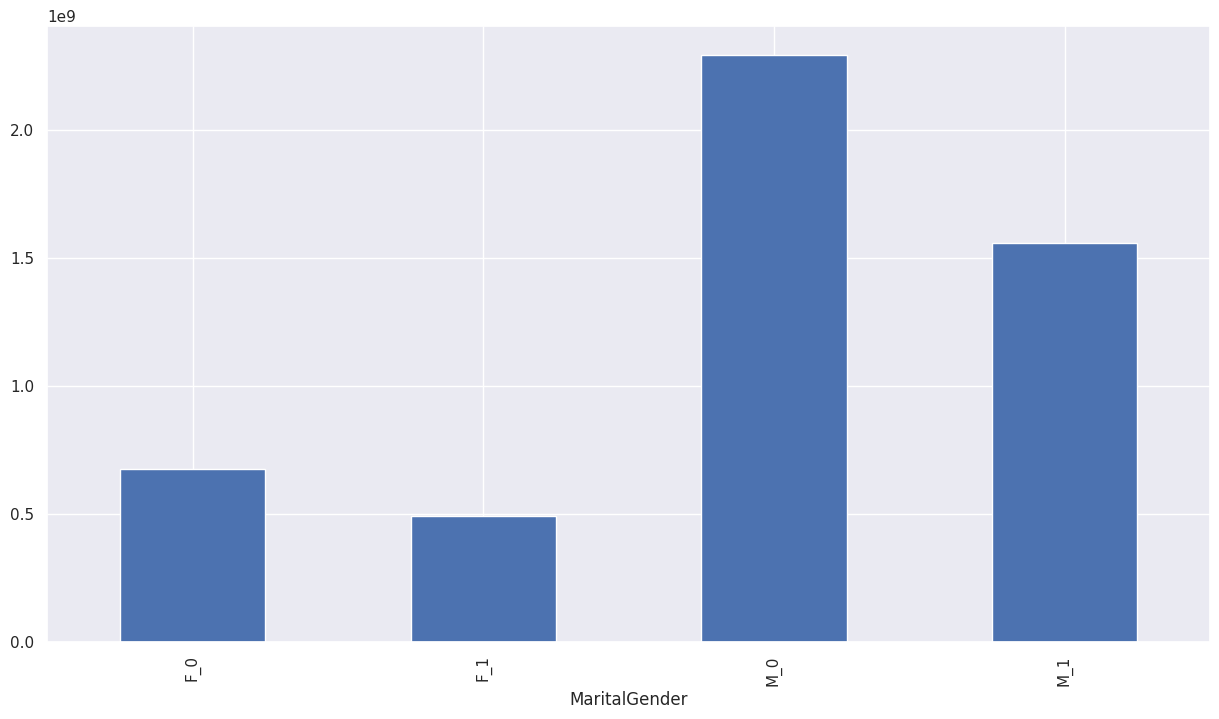

In [79]:
df.groupby('MaritalGender').sum()['Purchase'].plot(kind='bar')
# df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='bar')